## **Assignment 1 - Numerical Optimization & Large Scale Linear Algebra**

This notebook contains the implementation of all tasks from the first assignment for the Numerical Optimization and Large Scale Linear Algebra course

### **• Task 1**

<u>**Description**</u>

**Using colormap, create two graphs to show the illumination of the two patterns: The firrst with all lamps set to 1 and the other that minimize the sum square deviation with a desired uniform illumination. Which are the Root Mean Squared (RMS) errors in both cases?**

<u>**Solution**</u>

Import some packages

In [2]:
# Importing some required packages

import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize

Initialize some variables

In [3]:
# Setting some parameters
total_lamps = 10
total_pixels = 625

# Setting the coordinates and the height of the lamps
lamps_positions = np.array(
    [
        [4.1, 20.4, 4],
        [14.1, 21.3, 3.5],
        [22.6, 17.1, 6],
        [5.5, 12.3, 4],
        [12.2, 9.7, 4],
        [15.3, 13.8, 6],
        [21.3, 10.5, 5.5],
        [3.9, 3.3, 5],
        [13.1, 4.3, 5],
        [20.3, 4.2, 4.5],
    ]
)

# Computing the coordinates of the pixels
pixels_coordinates = np.array([[x, y] for x in range(25) for y in range(25)])

# Initializing a matrix keeping the contribution of each lamp to the regions/pixels
lamps_contribution = np.empty((total_pixels, total_lamps))

Define a function to generate the lamp contribution matrix, where each value is proportional to $d_{ij}^-2$. Here, $d_{ij}$ represents the distance between the center of the pixel and the lamp position, calculated using the following formula:

$$A = \frac{1}{d_{ij}^2} \quad \to \quad d_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2 + h_j^2}$$

where:

- $A$ represents the lamp contribution matrix
- $(x_i, y_i)$ represent the pixel coordinates
- $(x_j, y_j)$ represent the lamp coordinates
- $h_j$ represents the height of lamp above the floor

In [ ]:
def compute_lamp_contributions(lamps_positions, lamps_contribution, pixels_coordinates):
    """
    This function populates the matrix that represents the contribution of each lamp to
    every region/pixel, applying the inverse-square law of illumination. Each value in the
    matrix is proportional to the distance between the corresponding pixel and the lamp position.

    :param lamps_positions: The positions of the lamps
    :param lamps_contribution: A matrix for storing the contribution of the lamps
    :param pixels_coordinates: A matrix containing the coordinates of the pixels
    :return: The updated lamp contribution matrix
    """

    # Getting the shape of the matrix
    x_shape = lamps_contribution.shape[0]
    y_shape = lamps_contribution.shape[1]

    # Iterating over the pixels
    for x in range(x_shape):

        # Iterating over the lamps
        for y in range(y_shape):

            # Getting the distance of the pixel and the current lamp on x-axis
            argument_1 = (pixels_coordinates[x][0] - lamps_positions[y][0]) ** 2

            # Getting the distance of the pixel and the current lamp on y-axis
            argument_2 = (pixels_coordinates[x][1] - lamps_positions[y][1]) ** 2

            # Getting the height of the current lamp
            argument_3 = (lamps_positions[y][2]) ** 2

            # Computing the distance
            distance = 1 / (argument_1 + argument_2 + argument_3)

            # Updating the matrxis
            lamps_contribution[x][y] = distance

    return lamps_contribution

Compute the values of the lamp contribution matrix

In [ ]:
# Getting the values of the lamp contribution matrix
lamps_contribution = compute_lamp_contributions(
    lamps_positions, lamps_contribution, pixels_coordinates
)

As stated in the exercise, the lamp contribution matrix is scaled, meaning that when all lamps have a power of 1, the average illumination level across all pixels must be 1. Therefore, we need to normalize the lamp contribution matrix to achieve this average using the following formula:

$$A = \frac{A}{\text{mean}(A \cdot \vec {1})}$$

where:

- $A$ represents the lamp contribution matrix
- $\vec {1}$ represents the vector of ones

In [6]:
# Setting the power of the lamps to 1
lamps_one_power = np.ones((total_lamps))

# Getting the illumination levels in pixels
illumination_levels = lamps_contribution @ lamps_one_power

# Getting the average lighting level across the pixels
average_illumination_level = np.mean(illumination_levels)

# Normalizing
lamps_contribution = lamps_contribution / average_illumination_level

Define a method to visualize the illumination distribution across the pixels for given lamp power levels using a colormap/heatmap

In [ ]:
def visualize_illumination_levels(illumination_levels, lamps_positions, axis=None):
    """
    This function is used to create a colormap showing the distribution of the lighting
    across the pixels.

    :param illumination_levels: The lighting levels across the pixels
    :param lamps_positions: The positions of the lamps
    :param axis: The axis to plot on
    :return: None
    """

    # Reshaping the matrix to 25 x 25
    illumination_levels_reshaped = illumination_levels.reshape((25, 25))

    # Checking if axis is provided
    if axis is None:

        # Creating the figure
        plt.figure(figsize=(10, 8))

        # Displaying the illumination levels of the pixels
        image = plt.imshow(
            illumination_levels_reshaped,
            cmap="inferno",
            interpolation="nearest",
            extent=[0, 25, 0, 25],
        )

        # Setting some plot parameters
        plt.colorbar(image, label="Lighting Level")
        plt.title("Lighting levels in Pixels")
        plt.xlabel("X-Axis (m)")
        plt.ylabel("Y-Axis (m)")

        # Showing also the lamps
        plt.scatter(
            lamps_positions[:, 0],
            lamps_positions[:, 1],
            color="black",
            s=30,
            label="Lamps",
        )

        # Iterating over all the lamps
        for lamp, position in enumerate(lamps_positions, start=1):

            # Giving a title to every depicted lamp
            plt.text(
                position[0],
                position[1] + 0.6,
                f"{lamp} ({position[2]:.2f}m)",
                color="black",
                fontsize=10,
                ha="center",
                fontweight="bold",
            )

        # Showing the legends
        plt.legend()

        # Showing the plot
        plt.show()

    else:

        # Displaying the illumination levels of the pixels
        image = axis.imshow(
            illumination_levels_reshaped,
            cmap="inferno",
            interpolation="nearest",
            extent=[0, 25, 0, 25],
        )

        # Setting some plot parameters
        plt.colorbar(image, ax=axis, label="Lighting Level")
        axis.set_title("Lighting levels in Pixels")
        axis.set_xlabel("X-Axis (m)")
        axis.set_ylabel("Y-Axis (m)")

        # Showing also the lamps
        axis.scatter(
            lamps_positions[:, 0],
            lamps_positions[:, 1],
            color="black",
            s=30,
            label="Lamps",
        )

        # Iterating over all the lamps
        for lamp, position in enumerate(lamps_positions, start=1):

            # Giving a title to every depicted lamp
            axis.text(
                position[0],
                position[1] + 0.6,
                f"{lamp} ({position[2]:.2f}m)",
                color="black",
                fontsize=10,
                ha="center",
                fontweight="bold",
            )

        # Showing the legends
        axis.legend()

##### **Pattern 1 $\to$ All Lamp Powers Set to 1**

Generate a colormap representing the illumination levels of all pixels with the power of all lamps set to 1

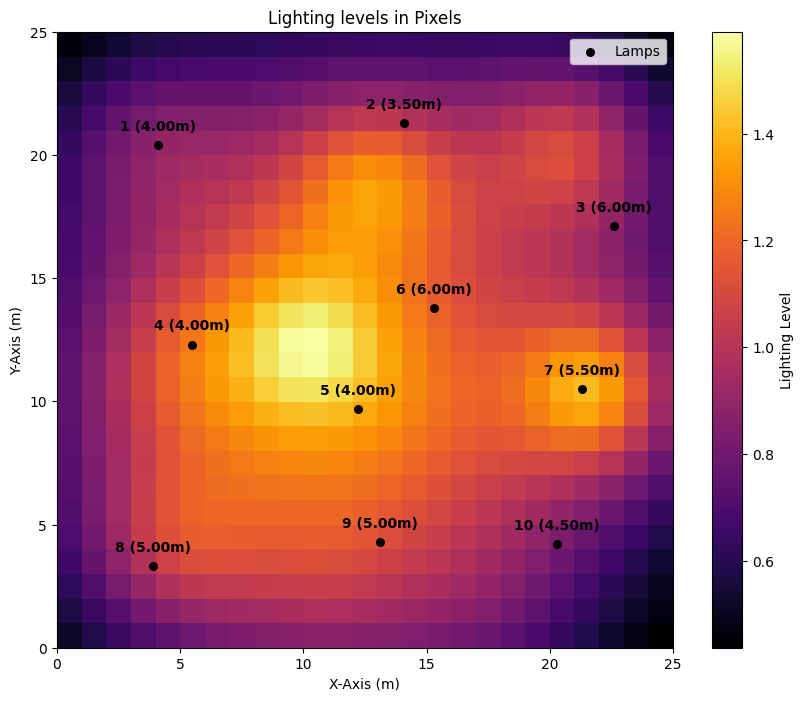

In [8]:
# Computing the new illumination levels
pattern_1_illumination_levels = lamps_contribution @ lamps_one_power

# Generating the colormap
visualize_illumination_levels(pattern_1_illumination_levels, lamps_positions)

Calculate the Root Mean Squared Error (RMSE) metric using the following formula:

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (l_i - l_{\text{target},i})^2}$$

where:

- $n$ represents the total number of pixels
- $l_i$ represents the achieved illumination level at pixel 𝑖 based on the current configuration
- $l_{\text{target},i}$ represents the desired illumination level at pixel 𝑖

In [ ]:
# Setting the target of the illumination levels
illumination_levels_target = np.ones((total_pixels))

# Computing the rmse metric
pattern_1_rmse = np.sqrt(
    np.mean((pattern_1_illumination_levels - illumination_levels_target) ** 2)
)

print(
    f"The Root Mean Squared Error (RMSE) in the first pattern is: {pattern_1_rmse:.4f}"
)

The Root Mean Squared Error (RMSE) in the first pattern is: 0.2433


##### **Pattern 2 $\to$ Uniform Illumination with Level 1 - Unconstrained Least Squares (LS)**

We need to determine the lamp power values that ensure an illumination level of 1 across all pixels using the Least Squares (LS) criterion. Specifically, we aim to find the lamp power levels that minimize the sum of squared deviations from the target illumination levels, which is represented by the vector of ones, as shown below:

$$\min_p ||Ap - l_{\text{target}}||_2^2$$

where:

- $A$ represents the lamp contribution matrix
- $p$ represents the estimated lamp power levels
- $l_{\text{target}}$ represents the target illumination levels

In [ ]:
# Estimating the power of the lamps
unconstrained_estimated_lamps_power = np.linalg.lstsq(
    lamps_contribution, illumination_levels_target, rcond=None
)[0]

# Getting the estimated illumination levels
pattern_2_illumination_levels = lamps_contribution @ unconstrained_estimated_lamps_power

# Creating a form for printing the estimated lamp powers
printing_form = "".join(
    [
        f"\nLamp {lamp}: {lamp_power:.4f}"
        for lamp, lamp_power in enumerate(unconstrained_estimated_lamps_power, start=1)
    ]
)

print(
    f"The estimated lamp powers are:\n{printing_form}\n\nSum of lamp powers:{np.sum(unconstrained_estimated_lamps_power):.2f}"
)

The estimated lamp powers are:

Lamp 1: 1.4588
Lamp 2: 0.7405
Lamp 3: 2.8559
Lamp 4: 0.7496
Lamp 5: 0.0037
Lamp 6: 0.3911
Lamp 7: 0.1490
Lamp 8: 2.1304
Lamp 9: 0.9556
Lamp 10: 1.4791

Sum of lamp powers:10.91


Generate the corresponding colormap representing the illumination levels of all pixels using the estimated power values

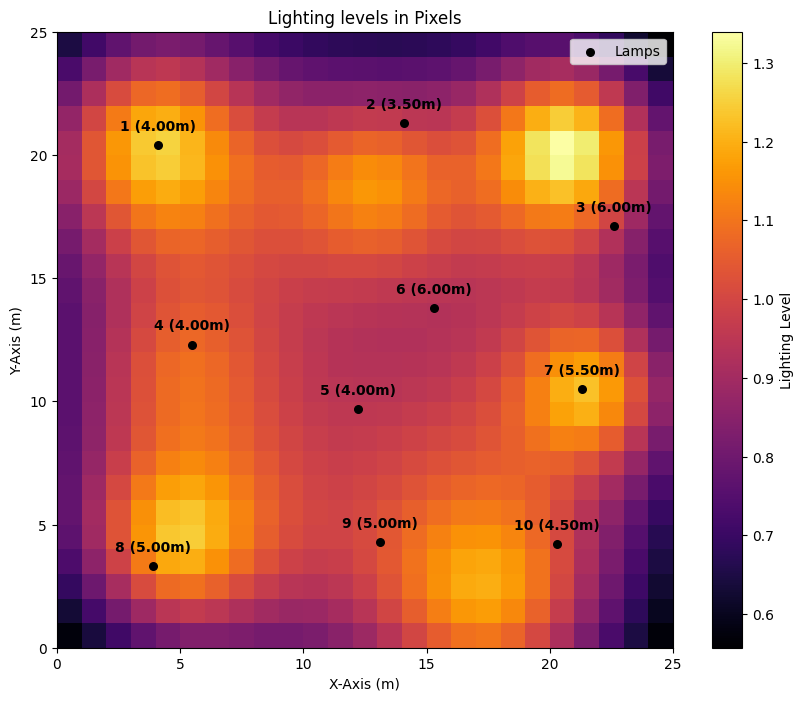

In [11]:
# Generating the colormap
visualize_illumination_levels(pattern_2_illumination_levels, lamps_positions)

Calculate the Root Mean Squared Error (RMSE) metric using the predefined formula

In [ ]:
# Computing the rmse metric
pattern_2_rmse = np.sqrt(
    np.mean((pattern_2_illumination_levels - illumination_levels_target) ** 2)
)

print(
    f"The Root Mean Squared Error (RMSE) in the second pattern is: {pattern_2_rmse:.4f}"
)

The Root Mean Squared Error (RMSE) in the second pattern is: 0.1402


##### **Inference for Both Illumination Patterns**

**First Pattern $\to$ All Lamp Powers Set to 1**

- The lighting is unevenly distributed, forming areas where multiple lamps contribute significantly
- The central area has higher light, while the other areas receive significantly less light, leading to an imbalance
- The relatively high RMSE suggests that the actual illumination levels deviate significantly from the target vector of ones

**Second Pattern $\to$ Uniform Illumination with Level 1 - Unconstrained Least Squares (LS)**

- The lighting is more evenly distributed
- There is less variation in illumination between regions
- The lower RMSE shows that the actual illumination is closer to the desired uniform illumination
- Despite the improvement, some very bright spots remain, indicating the need for further optimization


### **• Task 2**

<u>**Description**</u>

**Create the histogram of patch illumination values for all lamp powers one, and for lamp powers found by LS. Explain the results.**

<u>**Solution**</u>

Generate two histograms to visualize the lighting values of the pixels for both patterns from task 1

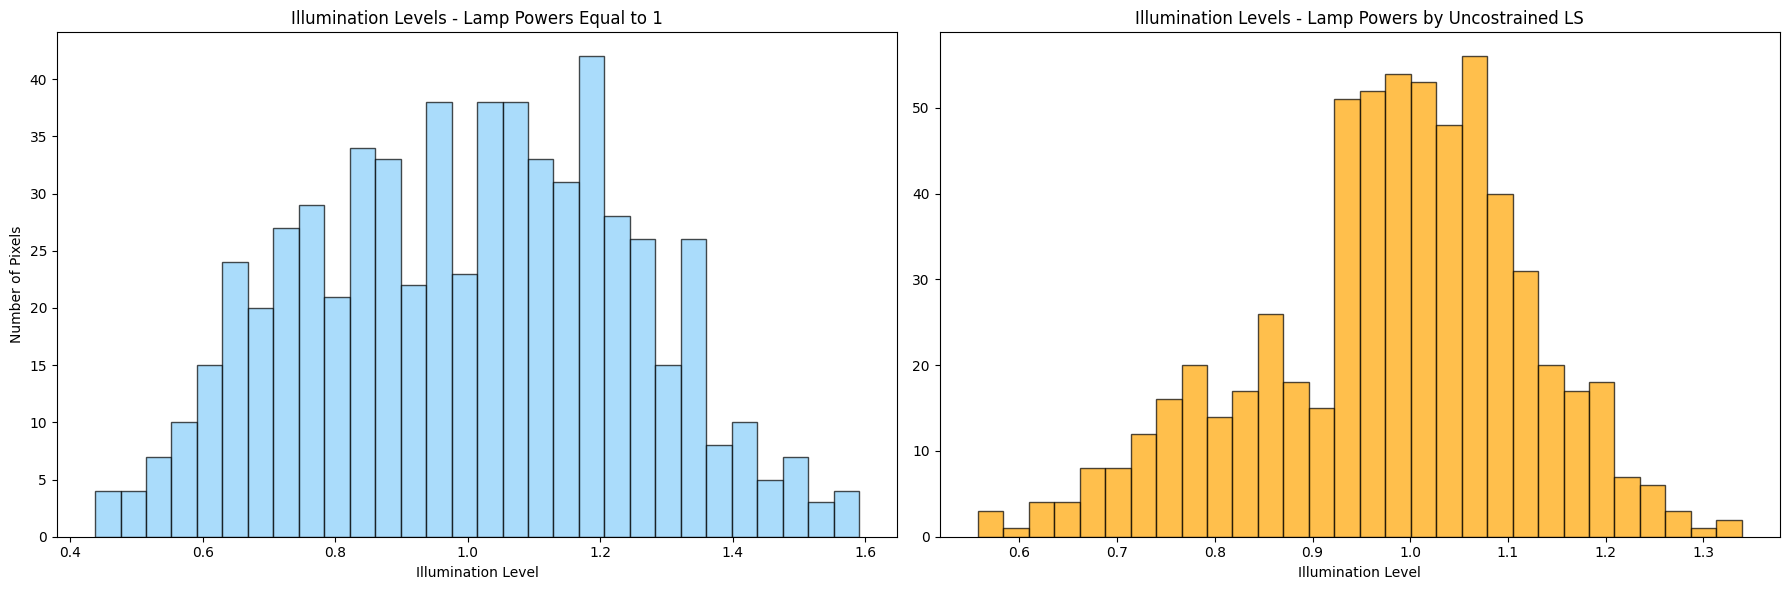

In [ ]:
# Defining the number of bins
bins = 30

# Creating two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Creating the histogram for all lamp powers set to 1
axes[0].hist(
    pattern_1_illumination_levels,
    bins=bins,
    color="lightskyblue",
    edgecolor="black",
    alpha=0.7,
)

# Setting some plots parameters
axes[0].set_title("Illumination Levels - Lamp Powers Equal to 1")
axes[0].set_xlabel("Illumination Level")
axes[0].set_ylabel("Number of Pixels")

# Creating the histogram for lamp powers found by LS criterion
axes[1].hist(
    pattern_2_illumination_levels,
    bins=bins,
    color="orange",
    edgecolor="black",
    alpha=0.7,
)

# Setting some plots parameters
axes[1].set_title("Illumination Levels - Lamp Powers by Uncostrained LS")
axes[1].set_xlabel("Illumination Level")

# Showing the histograms
plt.tight_layout()
plt.show()

##### **Inference for Both Histograms**

**First Pattern $\to$ All Lamp Powers Set to 1**

- The histogram is wider, indicating greater variation in illumination levels across different regions
- Illumination levels range from approximately 0.4 to 1.6, highlighting a significant deviation from the desired uniform illumination of 1
- The presence of multiple high peaks at different illumination levels suggests that some areas receive significantly more or less light than others, confirming the uneven distribution observed in the colormap

**Second Pattern $\to$ Uniform Illumination with Level 1 - Unconstrained Least Squares (LS)**

- The histogram is more concentrated around 1, indicating that the optimization process successfully reduced illumination variance
- The range is now narrower (approximately 0.6 to 1.3), suggesting fewer extreme variations in lighting compared to the first pattern
- The peaks converge around 1, demonstrating that a larger number of pixels have illumination levels close to the target illumination of 1

### **• Task 3**

<u>**Description**</u>

**The above choice of points for the lamps was made in such a way to ensure positivity in the corresponding power of the lamps. Now you have to add an extra constraint. The total energy consumption of the lamps will be equal 10 and non of them could be negative. Find the new power distribution of the lamps in order to ensure the least square (under constraints) optimality.**

<u>**Solution**</u>

Here, we need to determine the lamp power values that ensure an illumination level of 1 across all pixels using the Least Squares (LS) criterion while satisfying certain constraints. Specifically, we aim to find the lamp power levels that minimize the sum of squared deviations from the target illumination levels, represented by a vector of ones, while adhering to the following constraints:

1. The total sum of the lamp power levels must be equal to 10
2. The lamp power levels must be non-negative

The problem formulation is as follows:

$$\min_p ||Ap - l_{\text{target}}||_2^2$$

subject to:

$$\sum_{i=1}^{n} p_i = 10, \quad p_i \ge 0$$

where:

- $A$ represents the lamp contribution matrix
- $p$ represents the estimated lamp power levels
- $l_{\text{target}}$ represents the target illumination levels
- $n$ represents the total number of pixels

Define the objective function to be minimized based on the Least Squares criterion

In [ ]:
def define_objective(lamps_power, lamps_contribution, illumination_levels_target):
    """
    This function serves as the objective function for minimizing the
    lamp power estimation using the least squares criterion with constraints.

    :param lamps_power: The power levels of the lamps
    :param lamps_contribution: The lamps contribution matrix
    :param illumination_levels_target: The desired illumination levels
    :return: The sum square deviation from the desired illumination (1 vector)
    """

    return (
        np.linalg.norm(lamps_contribution @ lamps_power - illumination_levels_target)
        ** 2
    )

Estimate the lamp power levels by optimizing the Least Squares solution under the specific constraints

In [ ]:
# Setting the sum-to-10 constraint
sum_to_10_constraint = [
    {"type": "eq", "fun": lambda lamps_power: np.sum(lamps_power) - 10}
]

# Setting non-negative constraint for the lamp powers
non_negative_constraint = [(0, None)] * total_lamps

# Setting the initial lamp powers
initial_lamps_power = np.ones(10)

# Estimating
estimation = minimize(
    lambda lamps_power: define_objective(
        lamps_power, lamps_contribution, illumination_levels_target
    ),
    initial_lamps_power,
    constraints=sum_to_10_constraint,
    bounds=non_negative_constraint,
    method="SLSQP",
)

# Getting the estimated lamp powers
constrainted_estimated_lamps_power = estimation.x

# Creating a form for printing the estimated lamp powers
printing_form = "".join(
    [
        f"\nLamp {lamp}: {lamp_power:.4f}"
        for lamp, lamp_power in enumerate(constrainted_estimated_lamps_power, start=1)
    ]
)

print(
    f"The estimated lamp powers are:\n{printing_form}\n\nSum of lamp powers:{np.sum(constrainted_estimated_lamps_power):.2f}"
)

The estimated lamp powers are:

Lamp 1: 1.3441
Lamp 2: 0.8766
Lamp 3: 2.2435
Lamp 4: 0.7850
Lamp 5: 0.2929
Lamp 6: 0.0000
Lamp 7: 0.4016
Lamp 8: 1.8724
Lamp 9: 0.8013
Lamp 10: 1.3824

Sum of lamp powers:10.00


Generate the corresponding colormap and histogram showing the distribution of light in pixels

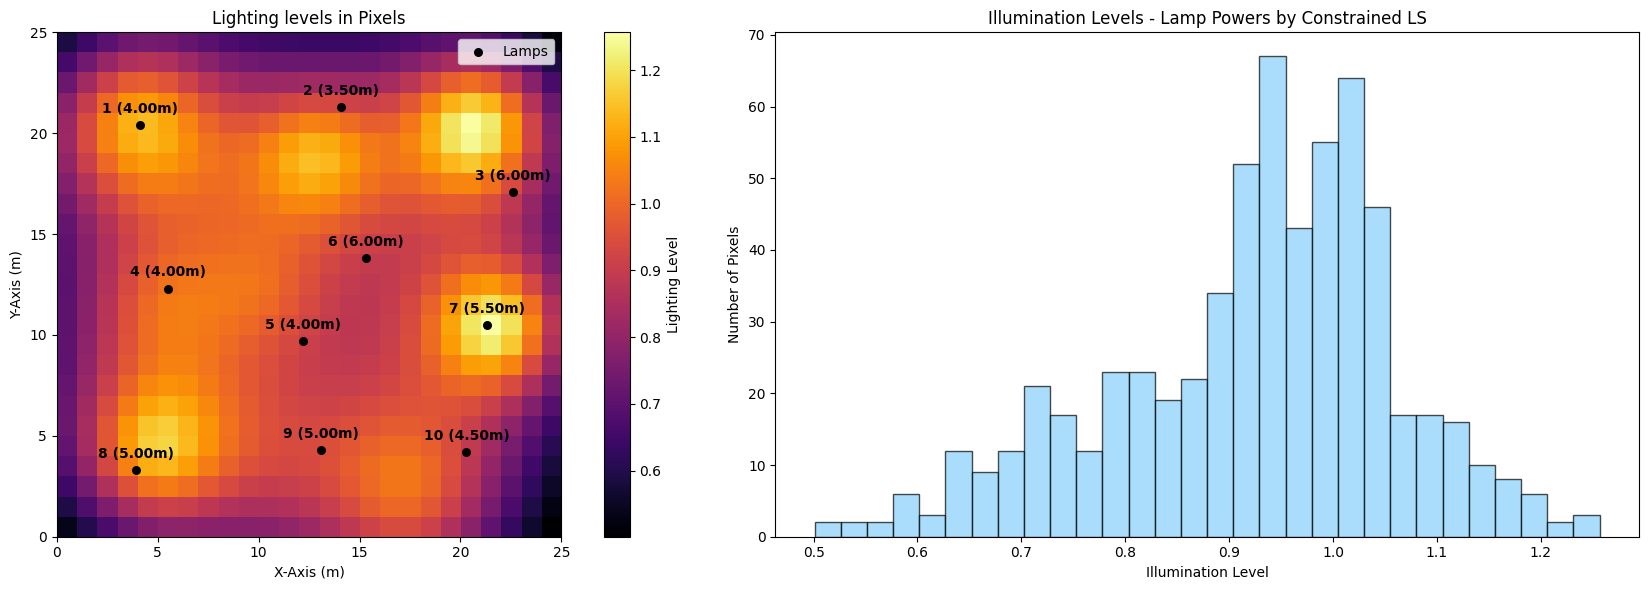

In [ ]:
# Getting the estimated illumination levels
pattern_3_illumination_levels = lamps_contribution @ constrainted_estimated_lamps_power

# Creating two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the colomap
visualize_illumination_levels(pattern_3_illumination_levels, lamps_positions, axes[0])

# Creating the histogram
axes[1].hist(
    pattern_3_illumination_levels,
    bins=bins,
    color="lightskyblue",
    edgecolor="black",
    alpha=0.7,
)

# Setting some plots parameters
axes[1].set_title("Illumination Levels - Lamp Powers by Constrained LS")
axes[1].set_xlabel("Illumination Level")
axes[1].set_ylabel("Number of Pixels")

# Showing the plots
plt.tight_layout()
plt.show()

Calculate the Root Mean Squared Error (RMSE) metric using the predefined formula

In [ ]:
# Computing the rmse metric
pattern_3_rmse = np.sqrt(
    np.mean((pattern_3_illumination_levels - illumination_levels_target) ** 2)
)

print(
    f"The Root Mean Squared Error (RMSE) in the third pattern (constrained LS) is: {pattern_3_rmse:.4f}"
)

The Root Mean Squared Error (RMSE) in the third pattern (constrained LS) is: 0.1558


##### **Inference for Constrained Least Squares**

- The lighting remains evenly distributed, similar to the unconstrained LS solution, with minimal variation in illumination between regions
- Most illumination values are centered around 1, closely aligning with the target illumination level
- The RMS is slightly higher than in the unconstrained LS case but lower than in the uniform power (1) scenario
- The increase in RMSE is expected due to the imposed constraints
- This solution is more practical and energy-efficient for real-world applications

### **• Task 4**

<u>**Description**</u>

**Challenge. Try to find, new points for the lamps to beat the RMS error of the first question. The lamps can be in any height between 4 and 6 meters and of course inside the area. Again, the total energy of the lamps should be 10 and non of them should be negative. Run different -random- choices of positions until you find a better solution. For this choice of points, create present the colormap picture of the illumination as well as the histogram of the intensities of the pixels of the area.**

<u>**Solution**</u>

Here, we need to determine lamp positions that provide a better solution with a lower RMSE than the 0.1402 obtained in Question 1 using the unconstrained Least Squares (LS) solution. To achieve this, we will conduct multiple experiments by testing different random lamp positions. For each configuration, we will estimate the lamp power levels by optimizing the LS criterion while adhering to the predefined constraints. This process will continue until we identify a set of lamp positions that result in a lower RMSE compared to both the unconstrained LS and the constrained LS solutions, as the latter yielded a higher RMSE than the former

In [ ]:
# Setting some parameters to track the positions that give a better RMSE
best_rmse = pattern_2_rmse
best_lamps_positions = None
best_lamps_power = None
best_illumination_levels = None

# Iterating until an interruption is triggered
while True:

    # Setting random positions for the lamps
    tested_lamps_positions = np.column_stack(
        (
            np.random.uniform(0, 25, total_lamps),
            np.random.uniform(0, 25, total_lamps),
            np.random.uniform(4, 6, total_lamps),
        )
    )

    # Initializing a matrix keeping the contribution of each lamp to the regions/pixels
    tested_lamps_contribution = np.empty((total_pixels, total_lamps))

    # Computing the current lamp contribution matrix
    tested_lamps_contribution = compute_lamp_contributions(
        tested_lamps_positions, tested_lamps_contribution, pixels_coordinates
    )

    # Normalizing the matrix
    tested_average_illumination_level = np.mean(
        tested_lamps_contribution @ lamps_one_power
    )
    tested_lamps_contribution = (
        tested_lamps_contribution / tested_average_illumination_level
    )

    # Estimating using the constrained LS criterion
    tested_estimation = minimize(
        lambda lamps_power: define_objective(
            lamps_power, tested_lamps_contribution, illumination_levels_target
        ),
        initial_lamps_power,
        constraints=sum_to_10_constraint,
        bounds=non_negative_constraint,
        method="SLSQP",
    )

    # Getting the estimated lamp powers
    tested_lamps_power = tested_estimation.x

    # Getting the illumination levels
    tested_illumination_levels = tested_lamps_contribution @ tested_lamps_power

    # Computing the rmse metric
    tested_rmse = np.sqrt(
        np.mean((tested_illumination_levels - illumination_levels_target) ** 2)
    )

    # Checking if we get a lower value of rmse
    if tested_rmse < best_rmse:

        # Updating the tracking parameters
        best_rmse = tested_rmse
        best_lamps_positions = tested_lamps_positions
        best_lamps_power = tested_lamps_power
        best_illumination_levels = tested_illumination_levels

        break

Show the achieved RMS along with the corresponding lamp positions and power levels

In [ ]:
# Creating a form for printing the new lamp positions
printing_form = "".join(
    [
        f"\nLamp {lamp}-> Coordinate X: {position[0]:.2f}, Cordinate Y: {position[1]:.2f}, Height: {position[2]:.2f}"
        for lamp, position in enumerate(best_lamps_positions, start=1)
    ]
)

print(f"A set of lamp positions that gives a better RMS metric is:\n{printing_form}")

# Creating a form for printing the estimated lamp powers
printing_form = "".join(
    [
        f"\nLamp {lamp}: {lamp_power:.4f}"
        for lamp, lamp_power in enumerate(best_lamps_power, start=1)
    ]
)

print(
    f"\nThe corresponding lamp powers that satisfy the constraints are:\n{printing_form}\n\nSum of lamp powers:{np.sum(best_lamps_power):.2f}"
)

print(f"\nRoot Mean Squared Erros (RMSE): {best_rmse:.4f}")

A set of lamp positions that gives a better RMS metric is:

Lamp 1-> Coordinate X: 21.26, Cordinate Y: 20.33, Height: 4.63
Lamp 2-> Coordinate X: 14.27, Cordinate Y: 1.11, Height: 5.54
Lamp 3-> Coordinate X: 12.78, Cordinate Y: 9.72, Height: 5.38
Lamp 4-> Coordinate X: 0.25, Cordinate Y: 20.72, Height: 4.84
Lamp 5-> Coordinate X: 13.85, Cordinate Y: 5.43, Height: 4.88
Lamp 6-> Coordinate X: 22.72, Cordinate Y: 13.37, Height: 5.11
Lamp 7-> Coordinate X: 11.92, Cordinate Y: 23.12, Height: 4.76
Lamp 8-> Coordinate X: 24.76, Cordinate Y: 7.64, Height: 4.68
Lamp 9-> Coordinate X: 2.23, Cordinate Y: 4.97, Height: 4.35
Lamp 10-> Coordinate X: 5.77, Cordinate Y: 16.02, Height: 4.33

The corresponding lamp powers that satisfy the constraints are:

Lamp 1: 1.2468
Lamp 2: 1.7517
Lamp 3: 0.8831
Lamp 4: 1.2356
Lamp 5: 0.0160
Lamp 6: 0.4123
Lamp 7: 1.1017
Lamp 8: 1.2728
Lamp 9: 1.3583
Lamp 10: 0.7217

Sum of lamp powers:10.00

Root Mean Squared (RMS): 0.1179


Generate the corresponding colormap and histogram showing the distribution of light in pixels

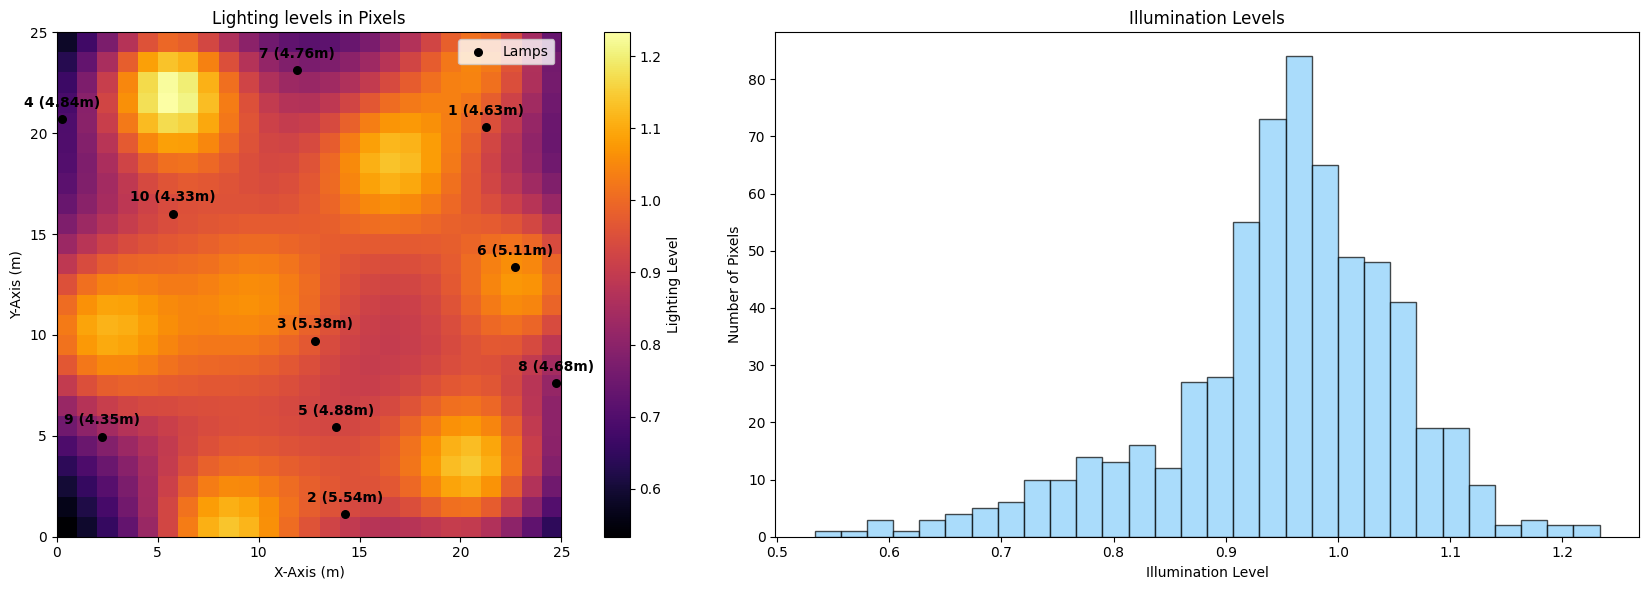

In [ ]:
# Creating two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plotting the colomap
visualize_illumination_levels(best_illumination_levels, best_lamps_positions, axes[0])

# Creating the histogram
axes[1].hist(
    best_illumination_levels,
    bins=bins,
    color="lightskyblue",
    edgecolor="black",
    alpha=0.7,
)

# Setting some plots parameters
axes[1].set_title("Illumination Levels")
axes[1].set_xlabel("Illumination Level")
axes[1].set_ylabel("Number of Pixels")

# Showing the plots
plt.tight_layout()
plt.show()

##### **Inference for Constrained Least Squares - Different Lamp Positions - Better RMSE**

- The illumination is more evenly distributed compared to previous constrained LS configurations
- Bright regions are present but less intense, indicating that the new lamp positions provide better coverage across the entire area
- The dark regions in the corners, observed in previous configurations, are less pronounced, suggesting that the new lamp placements improve lighting in those areas
- The histogram is more concentrated around 1, with fewer pixels exhibiting extremely low or high illumination levels
- The spread of illumination values is narrower than before, confirming that the illumination is closer to the target vector of ones
- The RMSE has decreased to 0.1179, demonstrating a significant improvement in illumination uniformity
- This reduction in error confirms that the new lamp positions are more effective in achieving the desired uniform lighting $(\vec {1})$ while still respecting the constraints